# ***Topic Modelling***
**1. Latar Belakang**

Judul berita sering kali bersifat singkat, sehingga sulit untuk diklasifikasikan hanya berdasarkan teks judul saja. Oleh karena itu, topic modeling dapat dimanfaatkan untuk mengidentifikasi pola kata dan mengelompokkan tema utama yang tersembunyi dalam kumpulan judul tersebut. Sebagai model unsupervised, topic modeling mampu mendeteksi tema-tema baru atau subtopik yang lebih granular, yang mungkin tidak tercakup dalam label kategori yang telah ditentukan sebelumnya.

Penelitian ini menggunakan dataset dari detik.com dengan kategori health yang diambil dari 91.000 judul berita, yang telah diklasifikasikan ke dalam sembilan kategori utama: finance, food, health, hot, inet, news, oto, sport, dan travel. Dengan menerapkan metode topic modeling LDA dan BERTopic, analisis ini bertujuan untuk mengidentifikasi topik-topik utama yang tersembunyi di dalam kumpulan data pada kategori utama health.

**2. Fokus Analisis**

Penelitian ini berfokus pada eksplorasi dan identifikasi topik-topik tersembunyi dalam judul berita detik.com menggunakan metode topic modeling (LDA dan BERTopic). Tujuannya adalah untuk mengungkap subtopik atau tema baru yang muncul dari kumpulan judul berita yang ada pada kategori berita health.

In [1]:
!pip install pandas==1.5.3 numpy==1.24.4

# **1. LOAD DATA**
> Data diambil dari https://github.com/ibamibrahim/dataset-judul-berita-indonesia/blob/master/detik_news_title.csv

In [2]:
import pandas as pd
df = pd.read_excel('/content/detik_news_title (1).xlsx')
df

,date,url,title,category
0,02/17/2020,https://health.detik.com/sexual-health/d-49029...,"Pemuda Sulsel Curi CD dan Bra Emak-emak, Terma...",health
1,02/17/2020,https://health.detik.com/sexual-health/d-49028...,"Pemuda di Sulsel Curi Bra dan 'CD' Emak-emak, ...",health
2,02/17/2020,https://health.detik.com/berita-detikhealth/d-...,Netizen Sebut Health Alert Card Ribet dan Tak ...,health
3,02/17/2020,https://health.detik.com/sexual-health/d-49029...,Apa yang Bikin Seks Terasa Menyenangkan? Riset...,health
4,02/17/2020,https://health.detik.com/berita-detikhealth/d-...,Studi Mengatakan COVID-19 Tidak Menular ke Janin,health
...,...,...,...,...
1995,2020-04-04 00:00:00,https://health.detik.com/berita-detikhealth/d-...,RS di AS Ancam Pecat Tenaga Medis Jika Adukan ...,health
1996,2020-04-04 00:00:00,https://health.detik.com/sexual-health/d-49646...,Tips Merangsang 'G-Spot' Saat Bercinta,health
1997,2020-12-06 00:00:00,https://health.detik.com/sexual-health/d-50517...,5 Manfaat Tidur Malam Tanpa Memakai Bra,health
1998,2020-12-06 00:00:00,https://health.detik.com/detiktv/d-5051740/seb...,Seberapa Siapkah Sektor Medis Indonesia Hadapi...,health


# **2. Text Preprocessing**

### *a. Case folding*

In [3]:
#case folding
import pickle
import re


#Buat fungsi untuk langkah case folding
def casefolding(text):
    if isinstance(text, str):
        # Membersihkan teks dari karakter non-alfanumerik, angka, dan simbol
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        # Menghapus spasi berlebih
        text = re.sub(r'\s+', ' ', text)
        # Mengubah teks menjadi lowercase
        text = text.lower()
        # Menghapus kata yang hanya terdiri dari 2 huruf
        text = re.sub(r'\b\w{1,2}\b', '', text)
        return text
    else:
        # Return the original value if it's not a string
        return text

### *b. Stemming*

In [4]:
!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 6.5 MB/s eta 0:00:00


In [5]:
#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

### *c. Stopwords Removal*

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
#membuat fungsi untuk langkah stopword removal
stopwords_ind = set(stopwords.words('indonesian'))

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

### *Load Text preprocessing*

In [9]:
#contoh sampel hasil preprocessing
sample = df['title'].iloc[2]
case_folding = casefolding(sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Netizen Sebut Health Alert Card Ribet dan Tak Efektif, Ini Kata Kemenkes
Case folding		:  netizen sebut health alert card ribet dan tak efektif ini kata kemenkes
Stopword removal	:  netizen health alert card ribet efektif kemenkes
Stemming		:  netizen health alert card ribet efektif kemenkes


In [10]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [11]:
%%time
df['text_preprocessing'] = df['title'].astype(str).apply(text_preprocessing_process)

CPU times: user 566 ms, sys: 3.37 ms, total: 569 ms
Wall time: 664 ms


In [12]:
df

,date,url,title,category,text_preprocessing
0,02/17/2020,https://health.detik.com/sexual-health/d-49029...,"Pemuda Sulsel Curi CD dan Bra Emak-emak, Terma...",health,pemuda sulsel curi bra emak emak fetish ganggu...
1,02/17/2020,https://health.detik.com/sexual-health/d-49028...,"Pemuda di Sulsel Curi Bra dan 'CD' Emak-emak, ...",health,pemuda sulsel curi bra emak emak ilmu hitam fe...
2,02/17/2020,https://health.detik.com/berita-detikhealth/d-...,Netizen Sebut Health Alert Card Ribet dan Tak ...,health,netizen health alert card ribet efektif kemenkes
3,02/17/2020,https://health.detik.com/sexual-health/d-49029...,Apa yang Bikin Seks Terasa Menyenangkan? Riset...,health,bikin seks senang riset ungkap jawab
4,02/17/2020,https://health.detik.com/berita-detikhealth/d-...,Studi Mengatakan COVID-19 Tidak Menular ke Janin,health,studi covid tular janin
...,...,...,...,...,...
1995,2020-04-04 00:00:00,https://health.detik.com/berita-detikhealth/d-...,RS di AS Ancam Pecat Tenaga Medis Jika Adukan ...,health,ancam pecat tenaga medis adu langka masker
1996,2020-04-04 00:00:00,https://health.detik.com/sexual-health/d-49646...,Tips Merangsang 'G-Spot' Saat Bercinta,health,tips rangsang spot cinta
1997,2020-12-06 00:00:00,https://health.detik.com/sexual-health/d-50517...,5 Manfaat Tidur Malam Tanpa Memakai Bra,health,manfaat tidur malam pakai bra
1998,2020-12-06 00:00:00,https://health.detik.com/detiktv/d-5051740/seb...,Seberapa Siapkah Sektor Medis Indonesia Hadapi...,health,siap sektor medis indonesia hadap new normal


In [13]:
df.to_csv('data clean lda.csv', index=False)

# **3. Latent Dirichlet Allocation (LDA)**

## *Tokenisasi*

In [14]:
!pip install nltk
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
data_text = df['text_preprocessing'].astype(str)

In [16]:
# CountVectorizer step untuk mengubah teks menjadi matriks frekuensi kata (Bag-of-Words / BoW).

# Inisialisasi CountVectorizer
bow = CountVectorizer(ngram_range=(1,2),          # untuk membuat unigram dan bigram
                      tokenizer=word_tokenize,    # untuk Tokenisasi menggunakan word_tokenize dari NLTK
                      min_df=5                    # untuk memfilter hanya kata (atau n-gram) yang muncul di ≥5 dokumen yang dimasukkan
                      )

# Mengubah seluruh teks dalam DataFrame menjadi matriks BoW
bow_matrix = bow.fit_transform(data_text)

# untuk mendapatkan daftar kosakata hasil vektorisasi
vocab = bow.get_feature_names_out()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## *Inisialisasi LDA*

In [17]:
def compute_umass_coherence(topic_word_distribution, bow_matrix, vocab, threshold=1e-5):
    num_topics, num_words = topic_word_distribution.shape
    coherence_scores = []

    # Ubah bow_matrix menjadi padat untuk pemrosesan yang lebih mudah
    bow_dense = bow_matrix.toarray()

    for topic_idx in range(num_topics):
       # untuk mendapatkan kata-kata terbaik untuk topik saat ini
        top_word_indices = topic_word_distribution[topic_idx].argsort()[::-1]

        topic_score = 0
        for i in range(len(top_word_indices)):
            for j in range(i + 1, len(top_word_indices)):
                word_i_idx = top_word_indices[i]
                word_j_idx = top_word_indices[j]

                freq_i     = np.sum(bow_dense[:, word_i_idx])
                co_occurrence_ij = np.sum(bow_dense[:, word_i_idx] * bow_dense[:, word_j_idx])

                if freq_i > 0:
                    topic_score += np.log((co_occurrence_ij + 1) / freq_i)
                else:
                    topic_score += np.log(1e-10)

        coherence_scores.append(topic_score)

    return np.mean(coherence_scores)

In [21]:
import numpy as np

topic_numbers = range(2, 10, 1)  #Membuat daftar jumlah topik yang akan diuji (karena range(2, 15) artinya dari 2 sampai sebelum 15)
coherence_values = []
model_list = []


# Fungsi untuk melatih model LDA dan menghitung koherensi untuk setiap jumlah topik
for num_topics in topic_numbers:
    print(f"Training LDA model with {num_topics} topics...")
    lda = LatentDirichletAllocation(n_components=num_topics,  # Jumlah topik
                                    max_iter=10,              # Jumlah iterasi training
                                    random_state=30)          # mengatur nilai acak
    lda.fit(bow_matrix)
    model_list.append(lda)

#fungsi komputasi coherence score
    topic_word_distribution = lda.components_
    coherence = compute_umass_coherence(topic_word_distribution, bow_matrix, vocab)
    coherence_values.append(coherence)
    print(f"Coherence Score for {num_topics} topics: {coherence:.4f}")

Training LDA model with 2 topics...
Coherence Score for 2 topics: -644493.4748
Training LDA model with 3 topics...
Coherence Score for 3 topics: -638657.1104
Training LDA model with 4 topics...
Coherence Score for 4 topics: -636313.4919
Training LDA model with 5 topics...
Coherence Score for 5 topics: -633100.2811
Training LDA model with 6 topics...
Coherence Score for 6 topics: -632358.3622
Training LDA model with 7 topics...
Coherence Score for 7 topics: -631075.6589
Training LDA model with 8 topics...
Coherence Score for 8 topics: -633649.7973
Training LDA model with 9 topics...
Coherence Score for 9 topics: -632031.3703


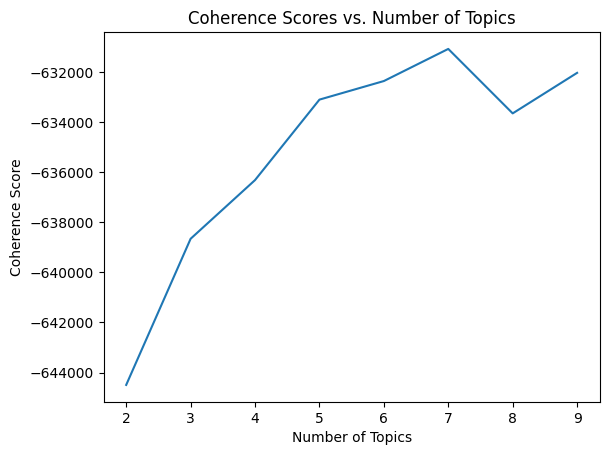

In [22]:
#visualiasasi coherence score
import matplotlib.pyplot as plt

plt.plot(topic_numbers, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.show()

## *Result*
Nilai U-Mass Coherence Score merupkan metrik negatif, dimana artinya nilai yang lebih mendekati nol berarti lebih baik. Berdasarkan grafik ditas nilai tertinggi (paling mendekati nol) pada jumlah topik 7.



In [23]:
#fungsi untuk menemukan jumlah topik yang optimal berdasarkan nilai coherence
best_topik          = coherence_values.index(max(coherence_values))
optimal_num_topics  = topic_numbers[best_topik]
optimal_lda_model   = model_list[best_topik]

print(f"Jumlah topik optimal berdasarkan Coherence Score: {optimal_num_topics}")

Jumlah topik optimal berdasarkan Coherence Score: 7


In [24]:
# Menggunakan fungsi get_topic yang didefinisikan sebelumnya untuk mencetak kata-kata teratas untuk setiap topik
def get_topic(model, feature_names, n_top_words=15):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Dengan asumsi 'vocab' dan 'get_topic' tersedia dari sel sebelumnya
print(f"\nTop words for each topic in the optimal {optimal_num_topics}-topic model:")
get_topic(optimal_lda_model, vocab)


Top words for each topic in the optimal 7-topic model:
Topic #0:
corona pandemi makan bikin sakit pandemi corona seks gara sebab waspada kenal beda buka ciri pasang
Topic #1:
corona virus virus corona positif covid indonesia pasien positif corona sebar tular infeksi corona covid positif virus gejala corona indonesia
Topic #2:
cinta pria wanita medis atas tips disinfektan pneumonia tidur banjir china korban orgasme tenaga orang
Topic #3:
sehat corona manfaat new normal new normal hadap jantung rumah didi kempot didi kempot pulang minum psbb
Topic #4:
masker pakai corona viral cegah pakai masker banjir fakta hati sanitizer hand sanitizer hand jam cuci cegah corona
Topic #5:
corona pasien virus pasien corona virus corona tular tingkat dokter mati sembuh anak obat who persen wabah
Topic #6:
tinggal corona indonesia sembuh corona indonesia sembuh tinggal pasien sebar positif pasien virus positif sembuh update update corona virus corona virus


In [25]:
# Dapatkan distribusi dokumen-topik untuk model optimal
optimal_lda_matrix = optimal_lda_model.transform(bow_matrix)

# Anda kemudian dapat menambahkan informasi ini kembali ke DataFrame Anda
# Misalnya, menemukan topik dominan untuk setiap dokumen:
df['dominant_topic'] = optimal_lda_matrix.argmax(axis=1)


print("\nDataFrame with dominant topic assigned:")
print(df.head())


DataFrame with dominant topic assigned:
         date                                                url  \
0  02/17/2020  https://health.detik.com/sexual-health/d-49029...   
1  02/17/2020  https://health.detik.com/sexual-health/d-49028...   
2  02/17/2020  https://health.detik.com/berita-detikhealth/d-...   
3  02/17/2020  https://health.detik.com/sexual-health/d-49029...   
4  02/17/2020  https://health.detik.com/berita-detikhealth/d-...   

                                               title category  \
0  Pemuda Sulsel Curi CD dan Bra Emak-emak, Terma...   health   
1  Pemuda di Sulsel Curi Bra dan 'CD' Emak-emak, ...   health   
2  Netizen Sebut Health Alert Card Ribet dan Tak ...   health   
3  Apa yang Bikin Seks Terasa Menyenangkan? Riset...   health   
4   Studi Mengatakan COVID-19 Tidak Menular ke Janin   health   

                                  text_preprocessing  dominant_topic  
0  pemuda sulsel curi bra emak emak fetish ganggu...               3  
1  pemuda sulsel 

## *Visualisasi LDA*



In [26]:
!pip install pyLDAvis==3.3.1 --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyLDAvis: filename=pyldavis-3.3.1-py2.py3-none-any.whl size=136992 sha256=a0c924253c48cb58ba582fd17acd34a70c3608138b114daaaa628ac4d5d762c6
  Stored in directory: /root/.cache/pip/wheels/ab/66/6b/e8fa7651eb6221f8ec10250e4c3f3c46d8c8e0ba51179101ab
Successfully built pyLDAvis


In [27]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires funcy, which is not installed.
pyldavis 3.3.1 requires gensim, which is not installed.
pyldavis 3.3.1 requires sklearn, which is not installed.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [28]:
!pip install funcy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires gensim, which is not installed.
pyldavis 3.3.1 requires sklearn, which is not installed.


In [29]:
import pyLDAvis
import pyLDAvis.sklearn

In [30]:
# patch tambahan untuk mengecek CountVectorizer memiliki fungsi get_feature_names
from sklearn.feature_extraction.text import CountVectorizer
if not hasattr(CountVectorizer, 'get_feature_names'):
    def get_feature_names(self):
        return self.get_feature_names_out()
    CountVectorizer.get_feature_names = get_feature_names

In [31]:
pyLDAvis.enable_notebook() # fungsi untuk menampilkan visualisasi langsung di Jupyter Notebook

# Menyiapkan visualisasi dengan model LDA yang sudah dilatih
panel = pyLDAvis.sklearn.prepare(optimal_lda_model,    # Model LDA yang sudah dilatih sebelumnya
                                 bow_matrix,           # Matriks hasil vektorisasi teks dari CountVectorizer
                                 bow                   # Objek CountVectorizer itu sendiri (untuk akses ke get_feature_names_out)
                                 )
panel

/usr/local/lib/python3.11/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.209112 -0.038799       1        1  21.949883
5      0.142207 -0.051939       2        1  17.814754
6      0.249975  0.024282       3        1  15.170617
0     -0.137154  0.077050       4        1  12.388883
4     -0.149436 -0.084203       5        1  12.203142
3     -0.115372  0.263070       6        1  10.942309
2     -0.199332 -0.189460       7        1   9.530412, topic_info=             Term        Freq       Total Category  logprob  loglift
693         virus  386.000000  386.000000  Default  30.0000  30.0000
694  virus corona  364.000000  364.000000  Default  29.0000  29.0000
645       tinggal  182.000000  182.000000  Default  28.0000  28.0000
375        masker   99.000000   99.000000  Default  27.0000  27.0000
250     indonesia  162.000000  162.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
576        serang   10.537544   18.360377   Topic7  -4.7391   1.7954
502         puasa   12.436172   35.452064   Topic7  -4.5734   1.3031
651       tingkat   12.319165   55.509256   Topic7  -4.5829   0.8453
564         sehat   12.083240   85.914549   Topic7  -4.6022   0.3891
129         covid   11.526225  111.848975   Topic7  -4.6494   0.0782

[388 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1         1  0.299539         ahli
1         2  0.108923         ahli
1         4  0.326770         ahli
1         5  0.108923         ahli
1         6  0.108923         ahli
...     ...       ...          ...
712       4  0.191045          wni
713       1  0.933145  wni positif
716       1  0.369627        wuhan
716       2  0.184814        wuhan
716       4  0.406590        wuhan

[530 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 7, 1, 5, 4, 3])

# **4. BERTopic**
BERTopic adalah metode topik modeling modern yang menggabungkan kekuatan representasi semantik dari transformer (seperti BERT) dengan algoritma clustering untuk menemukan dan memvisualisasikan topik-topik dalam kumpulan dokumen. Berbeda dengan metode klasik seperti LDA yang hanya mengandalkan frekuensi kata (bag-of-words), BERTopic memanfaatkan embeddings — yaitu representasi vektor dari teks yang mempertahankan makna semantik.

## *a. Load data untuk BERTopic*

In [1]:
import pandas as pd

In [2]:
# data yang digunakan sudah dilakukan preprocessing sebelumnya
data = pd.read_csv('/content/data clean lda (1).csv')

In [3]:
# Buat kolom baru yang berisi panjang setiap teks judul
data["text_len"] = data["text_preprocessing"].astype(str).apply(lambda x : len(x.split()))
data

,date,url,title,category,text_preprocessing,text_len
0,02/17/2020,https://health.detik.com/sexual-health/d-49029...,"Pemuda Sulsel Curi CD dan Bra Emak-emak, Terma...",health,pemuda sulsel curi bra emak emak fetish ganggu...,9
1,02/17/2020,https://health.detik.com/sexual-health/d-49028...,"Pemuda di Sulsel Curi Bra dan 'CD' Emak-emak, ...",health,pemuda sulsel curi bra emak emak ilmu hitam fe...,9
2,02/17/2020,https://health.detik.com/berita-detikhealth/d-...,Netizen Sebut Health Alert Card Ribet dan Tak ...,health,netizen health alert card ribet efektif kemenkes,7
3,02/17/2020,https://health.detik.com/sexual-health/d-49029...,Apa yang Bikin Seks Terasa Menyenangkan? Riset...,health,bikin seks senang riset ungkap jawab,6
4,02/17/2020,https://health.detik.com/berita-detikhealth/d-...,Studi Mengatakan COVID-19 Tidak Menular ke Janin,health,studi covid tular janin,4
...,...,...,...,...,...,...
1995,2020-04-04 00:00:00,https://health.detik.com/berita-detikhealth/d-...,RS di AS Ancam Pecat Tenaga Medis Jika Adukan ...,health,ancam pecat tenaga medis adu langka masker,7
1996,2020-04-04 00:00:00,https://health.detik.com/sexual-health/d-49646...,Tips Merangsang 'G-Spot' Saat Bercinta,health,tips rangsang spot cinta,4
1997,2020-12-06 00:00:00,https://health.detik.com/sexual-health/d-50517...,5 Manfaat Tidur Malam Tanpa Memakai Bra,health,manfaat tidur malam pakai bra,5
1998,2020-12-06 00:00:00,https://health.detik.com/detiktv/d-5051740/seb...,Seberapa Siapkah Sektor Medis Indonesia Hadapi...,health,siap sektor medis indonesia hadap new normal,7


In [4]:
#ntuk mencetak jumlah kata dari judul (headline) terpanjang
print("The longest headline has: {} words".format(data.text_len.max()))

The longest headline has: 11 words


## *b. Inisialisasi BERTopic*

In [5]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [6]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from collections import defaultdict

In [7]:
# Ubah kolom 'teks' menjadi tipe string
data['text_preprocessing'] = data['text_preprocessing'].astype(str).fillna('')

In [8]:
# Fungsi untuk menghitung PMI antara dua kata
def calculate_pmi(word1, word2, document_term_matrix, vocabulary):
    # Dapatkan indeks kata
    idx1 = vocabulary.get(word1)
    idx2 = vocabulary.get(word2)

    if idx1 is None or idx2 is None:
        return 0.0 # Kata tidak ditemukan

    # Hitung kemunculan bersama (co-occurrence) dalam dokumen
    # Ini adalah perkiraan sederhana, bisa lebih canggih
    co_occurrence_count = np.sum(document_term_matrix[:, idx1].toarray() * document_term_matrix[:, idx2].toarray())

    # Hitung kemunculan masing-masing kata
    count1 = np.sum(document_term_matrix[:, idx1].toarray())
    count2 = np.sum(document_term_matrix[:, idx2].toarray())

    num_documents = document_term_matrix.shape[0]

    # Hindari pembagian dengan nol
    if count1 == 0 or count2 == 0 or co_occurrence_count == 0:
        return 0.0

    # Hitung probabilitas
    p_word1_and_word2 = co_occurrence_count / num_documents
    p_word1 = count1 / num_documents
    p_word2 = count2 / num_documents

    # Hitung PMI
    pmi = np.log2(p_word1_and_word2 / (p_word1 * p_word2))

    return pmi

In [13]:
# Contoh loop untuk mencoba beberapa nilai nr_topics
coherence_scores_pmi = {}

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()
# Ubah teks menjadi matriks frekuensi kata
document_term_matrix = vectorizer.fit_transform(data.text_preprocessing)
# Dapatkan daftar kosakata
vocabulary = vectorizer.vocabulary_

for num_topics in range(5, 30, 5): # Coba rentang jumlah topik
    model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=7, nr_topics=num_topics)
    headline_topics, _ = model.fit_transform(data.text_preprocessing)

    # Dapatkan kata-kata teratas untuk setiap topik
    topic_words_dict = model.get_topics()
    topics = [[word for word, _ in model.get_topic(topic_id)] for topic_id in topic_words_dict.keys() if topic_id != -1] # Lewati topik outlier

    # Hitung coherence score berbasis PMI untuk setiap topik
    topic_coherence_scores = []
    for topic in topics:
        pmi_scores = []
        # Hitung PMI untuk setiap pasangan kata dalam topik
        for i in range(len(topic)):
            for j in range(i + 1, len(topic)):
                pmi = calculate_pmi(topic[i], topic[j], document_term_matrix, vocabulary)
                pmi_scores.append(pmi)

        # Rata-ratakan PMI scores untuk mendapatkan coherence score topik
        if pmi_scores:
            topic_coherence_scores.append(np.mean(pmi_scores))
        else:
            topic_coherence_scores.append(0.0) # Topik kosong atau hanya satu kata

    # Rata-ratakan coherence scores topik untuk mendapatkan coherence score model
    if topic_coherence_scores:
        coherence_scores_pmi[num_topics] = np.mean(topic_coherence_scores)
    else:
        coherence_scores_pmi[num_topics] = 0.0

    print(f"Jumlah Topik: {num_topics}, Coherence Score (PMI): {coherence_scores_pmi[num_topics]}")

2025-06-09 03:05:45,936 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-06-09 03:05:57,086 - BERTopic - Embedding - Completed ✓
2025-06-09 03:05:57,088 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-09 03:06:04,083 - BERTopic - Dimensionality - Completed ✓
2025-06-09 03:06:04,085 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-09 03:06:04,163 - BERTopic - Cluster - Completed ✓
2025-06-09 03:06:04,164 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-06-09 03:06:04,277 - BERTopic - Representation - Completed ✓
2025-06-09 03:06:04,279 - BERTopic - Topic reduction - Reducing number of topics
2025-06-09 03:06:04,289 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-09 03:06:04,336 - BERTopic - Representation - Completed ✓
2025-06-09 03:06:04,339 - BERTopic - Topic reduction - Reduced number of topics from 71 to 5
2025-06-09 03:06:04,604 - BERTopic - Embedding - Transforming documents to embeddings.


Jumlah Topik: 5, Coherence Score (PMI): 1.98770924088261


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-06-09 03:06:14,561 - BERTopic - Embedding - Completed ✓
2025-06-09 03:06:14,562 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-09 03:06:22,685 - BERTopic - Dimensionality - Completed ✓
2025-06-09 03:06:22,686 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-09 03:06:22,763 - BERTopic - Cluster - Completed ✓
2025-06-09 03:06:22,764 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-06-09 03:06:22,849 - BERTopic - Representation - Completed ✓
2025-06-09 03:06:22,850 - BERTopic - Topic reduction - Reducing number of topics
2025-06-09 03:06:22,861 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-09 03:06:22,901 - BERTopic - Representation - Completed ✓
2025-06-09 03:06:22,906 - BERTopic - Topic reduction - Reduced number of topics from 72 to 10
2025-06-09 03:06:23,285 - BERTopic - Embedding - Transforming documents to embeddings.


Jumlah Topik: 10, Coherence Score (PMI): 2.2906769958986133


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-06-09 03:06:34,120 - BERTopic - Embedding - Completed ✓
2025-06-09 03:06:34,121 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-09 03:06:41,127 - BERTopic - Dimensionality - Completed ✓
2025-06-09 03:06:41,128 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-09 03:06:41,202 - BERTopic - Cluster - Completed ✓
2025-06-09 03:06:41,203 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-06-09 03:06:41,296 - BERTopic - Representation - Completed ✓
2025-06-09 03:06:41,297 - BERTopic - Topic reduction - Reducing number of topics
2025-06-09 03:06:41,311 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-09 03:06:41,359 - BERTopic - Representation - Completed ✓
2025-06-09 03:06:41,362 - BERTopic - Topic reduction - Reduced number of topics from 69 to 15
2025-06-09 03:06:42,109 - BERTopic - Embedding - Transforming documents to embeddings.


Jumlah Topik: 15, Coherence Score (PMI): 2.39375740293444


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-06-09 03:06:51,990 - BERTopic - Embedding - Completed ✓
2025-06-09 03:06:51,992 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-09 03:07:02,385 - BERTopic - Dimensionality - Completed ✓
2025-06-09 03:07:02,388 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-09 03:07:02,517 - BERTopic - Cluster - Completed ✓
2025-06-09 03:07:02,520 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-06-09 03:07:02,751 - BERTopic - Representation - Completed ✓
2025-06-09 03:07:02,752 - BERTopic - Topic reduction - Reducing number of topics
2025-06-09 03:07:02,763 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-09 03:07:02,813 - BERTopic - Representation - Completed ✓
2025-06-09 03:07:02,819 - BERTopic - Topic reduction - Reduced number of topics from 69 to 20
2025-06-09 03:07:04,001 - BERTopic - Embedding - Transforming documents to embeddings.


Jumlah Topik: 20, Coherence Score (PMI): 2.4749511725136983


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-06-09 03:07:16,706 - BERTopic - Embedding - Completed ✓
2025-06-09 03:07:16,709 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-09 03:07:27,712 - BERTopic - Dimensionality - Completed ✓
2025-06-09 03:07:27,714 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-09 03:07:27,789 - BERTopic - Cluster - Completed ✓
2025-06-09 03:07:27,790 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-06-09 03:07:27,900 - BERTopic - Representation - Completed ✓
2025-06-09 03:07:27,901 - BERTopic - Topic reduction - Reducing number of topics
2025-06-09 03:07:27,913 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-09 03:07:27,970 - BERTopic - Representation - Completed ✓
2025-06-09 03:07:27,973 - BERTopic - Topic reduction - Reduced number of topics from 73 to 25


Jumlah Topik: 25, Coherence Score (PMI): 2.289232718415007


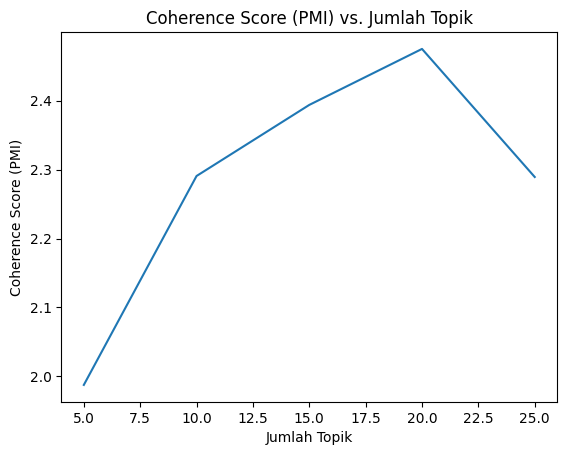

In [15]:
# Visualisasikan hasilnya
import matplotlib.pyplot as plt

plt.plot(list(coherence_scores_pmi.keys()), list(coherence_scores_pmi.values()))
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score (PMI)")
plt.title("Coherence Score (PMI) vs. Jumlah Topik")
plt.show()

In [16]:
# Temukan jumlah topik dengan coherence score PMI tertinggi
optimal_num_topics_pmi = max(coherence_scores_pmi, key=coherence_scores_pmi.get)
print(f"\nJumlah topik optimal berdasarkan coherence score PMI: {optimal_num_topics_pmi}")


Jumlah topik optimal berdasarkan coherence score PMI: 20


In [21]:
# Latih kembali model dengan jumlah topik optimal
optimal_model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=7, nr_topics=optimal_num_topics_pmi)
optimal_headline_topics, optimal_probs = optimal_model.fit_transform(data.text_preprocessing)

# Dapatkan informasi tentang topik
freq = optimal_model.get_topic_info()
print("\nInformasi Topik:")
print(freq)

2025-06-09 03:13:39,985 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-06-09 03:13:53,964 - BERTopic - Embedding - Completed ✓
2025-06-09 03:13:53,968 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-09 03:14:01,679 - BERTopic - Dimensionality - Completed ✓
2025-06-09 03:14:01,680 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-09 03:14:01,770 - BERTopic - Cluster - Completed ✓
2025-06-09 03:14:01,772 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-06-09 03:14:01,863 - BERTopic - Representation - Completed ✓
2025-06-09 03:14:01,864 - BERTopic - Topic reduction - Reducing number of topics
2025-06-09 03:14:01,876 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-09 03:14:01,926 - BERTopic - Representation - Completed ✓
2025-06-09 03:14:01,931 - BERTopic - Topic reduction - Reduced number of topics from 73 to 20



Informasi Topik:
    Topic  Count                                Name  \
0      -1    684      -1_corona_virus_tinggal_pasien   
1       0    667     0_corona_virus_indonesia_sembuh   
2       1    249     1_banjir_olahraga_sehat_manfaat   
3       2    115          2_masker_pakai_fakta_viral   
4       3     51           3_covid_who_positif_jubir   
5       4     41            4_cinta_posisi_seks_miss   
6       5     28       5_orgasme_sperma_wanita_cinta   
7       6     21     6_dampak_masturbasi_tubuh_buruk   
8       7     20  7_pneumonia_misterius_china_gempar   
9       8     15    8_kolesterol_lebaran_kalap_makan   
10      9     14         9_henti_didi_kempot_jantung   
11     10     14     10_sulianti_saroso_rspi_isolasi   
12     11     13         11_tidur_malam_mudah_bangun   
13     12     12            12_normal_new_hadap_siap   
14     13     12      13_sanitizer_hand_botol_refill   
15     14     11             14_jemur_index_bmkg_jam   
16     15      9           15_

## *c. Visualisasi*

In [25]:
optimal_model.visualize_barchart(top_n_topics=min(20, optimal_num_topics_pmi))

Saat nilai optimal_num_topics_pmi adalah 20, maka min(21, optimal_num_topics_pmi) akan menghasilkan 20.

Namun, BERTopic memiliki fitur khusus yang menambahkan topik dengan ID -1 untuk dokumen-dokumen outlier—yaitu dokumen yang tidak cocok dengan topik manapun. Jadi, meskipun model menemukan 20 topik utama (dari ID 0 sampai 19), topik -1 juga disertakan, sehingga totalnya menjadi 21 topik.

Ketika Anda mengatur top_n_topics=20, visualisasi biasanya tetap menampilkan topik -1, karena dianggap penting meskipun bukan bagian dari 20 topik utama. Inilah sebabnya mengapa visualisasi bisa terlihat hanya memuat 19 topik utama ditambah topik -1.

Untuk melihat semua topik yang ditemukan, termasuk topik -1, Anda bisa menjalankan optimal_model.get_topic_info().

In [19]:
model.visualize_topics()

In [20]:
model.visualize_hierarchy(top_n_topics=30)

# **5. EVALUASI**

1. Jumlah topik terbaik untuk masing-masing algoritma dengan coherence score

    a. LDA : Jumlah topik optimal berada di 7 topik dengan range jumlah topik yang diuji 2-10 topik

    b. BERTopic : Jumlah topik optimal berada di 20 topik dengan range jumlah topik yang diuji range jumlah topik yang digunakan untuk pengujian BERTopic adalah dari 5 hingga 25 topik.

2. Topik - topik yang dihasilkan LDA cenderung umum dan menyatu (topik besar) dengan COVID-19 sebagai topik dominan.Sedangkan, topik yang dihasilkan BERTopic lebih granular dan mencakup sub-subtema dengan COVID-19 tetap dominan, tetapi lebih bervariasi: lifestyle, seksualitas, tidur, dsb.

# **5. KESIMPULAN**
1. BERTopic cenderung menemukan jumlah topik yang lebih banyak dan berpotensi lebih koheren secara semantik karena menggunakan model bahasa modern. BERTopic juga memiliki fitur tambahan seperti identifikasi outlier dan visualisasi yang lebih beragam. Namun, LDA tetap merupakan metode yang efektif dan seringkali lebih cepat untuk dataset yang sangat besar, meskipun mungkin memerlukan lebih banyak usaha dalam interpretasi topik dan pemilihan jumlah topik.

2. Tantangan selama pelatihan model LDA, ditemukan beberapa tantangan. Semakin banyak jumlah topik (num_topics), waktu pelatihan menjadi semakin lama. Selain itu, LDA juga sering mengalami masalah kompatibilitas dengan versi pustaka seperti scikit-learn dan pandas, yang bisa menyebabkan error saat pelatihan. Sementara itu, BERTopic lebih cepat saat melatih model, meskipun jumlah topiknya banyak. Ini karena BERTopic menggunakan metode berbasis embedding dan clustering yang lebih efisien, terutama untuk data teks pendek seperti judul berita.